In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
import IPython

# Uncomment for Interactive Graphs
#%matplotlib widget

name = "GDX"
data = pd.read_csv("data/"+name + ".csv")
data.tail(5)

Open   High    Low  Close  Adj Close    Volume      Date
4608  39.80  40.22  39.77  40.09      40.09  27456000  24-09-13
4609  40.00  40.23  39.58  39.89      39.89  12162500  24-09-16
4610  39.70  40.08  39.31  39.49      39.49  17906900  24-09-17
4611  39.76  40.99  39.02  39.06      39.06  41241400  24-09-18
4612  40.10  40.25  39.26  39.72      39.72  22277500  24-09-19

In [2]:
# Adding indicators
data['Diff_Close'] = data['Adj Close']-data.Open
data['RSI']=ta.rsi(data.Close, length=14)
data['EMAF']=ta.ema(data.Close, length=18)
data['EMAM']=ta.ema(data.Close, length=50)
data['EMAS']=ta.ema(data.Close, length=200)
data.ta.bbands(append=True)
data.ta.stoch(append=True)


data['Target1'] = data['Diff_Close'].shift(-1)
data['Target2'] = data['Diff_Close'].shift(-2)
data['Target3'] = data['Diff_Close'].shift(-3)
data['Target4'] = data['Diff_Close'].shift(-4)
data['Target5'] = data['Diff_Close'].shift(-5)
data['Target6'] = data['Diff_Close'].shift(-6)
data['Target7'] = data['Diff_Close'].shift(-7)
data['Target8'] = data['Diff_Close'].shift(-8)
data['Target9'] = data['Diff_Close'].shift(-9)


data.dropna(inplace=True)
data.reset_index(inplace = True)
pd.set_option('display.max_columns', None)

data.tail(2)


index   Open   High    Low  Close  Adj Close    Volume      Date  \
4403   4602  37.66  37.83  37.28  37.33      37.33  16260000  24-09-05   
4404   4603  37.17  37.43  36.22  36.32      36.32  19939200  24-09-06   

      Diff_Close        RSI       EMAF       EMAM       EMAS  BBL_5_2.0  \
4403       -0.33  47.133189  37.965111  37.071605  33.759355  36.218919   
4404       -0.85  41.326931  37.791941  37.042130  33.784834  35.778392   

      BBM_5_2.0  BBU_5_2.0  BBB_5_2.0  BBP_5_2.0  STOCHk_14_3_3  \
4403     37.802  39.385081   8.375644   0.350924      15.729597   
4404     37.290  38.801608   8.107312   0.179150       9.755741   

      STOCHd_14_3_3  Target1  Target2  Target3  Target4  Target5  Target6  \
4403      32.100843    -0.85     0.15     0.46     0.49     1.15     0.29   
4404      18.352188     0.15     0.46     0.49     1.15     0.29    -0.11   

      Target7  Target8  Target9  
4403    -0.11    -0.21    -0.70  
4404    -0.21    -0.70    -0.38

In [3]:
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)
data_set = data
data_set.head()

index   Open   High    Low  Adj Close  Diff_Close        RSI       EMAF  \
0    199  38.70  38.70  37.97      32.99       -5.71  42.823849  39.130266   
1    200  38.02  38.73  37.93      33.52       -4.50  46.633750  39.079712   
2    201  38.44  38.75  37.06      32.22       -6.22  39.735192  38.876584   
3    202  37.01  37.48  36.46      32.40       -4.61  41.049977  38.716944   
4    203  37.68  38.44  37.68      33.17       -4.51  46.333706  38.666739   

        EMAM       EMAS  BBL_5_2.0  BBM_5_2.0  BBU_5_2.0  BBB_5_2.0  \
0  39.242898  38.151400  36.894752     37.894  38.893248   5.273910   
1  39.219647  38.156361  37.773181     38.240  38.706819   2.441522   
2  39.138484  38.146348  37.049243     38.054  39.058757   5.280689   
3  39.068740  38.138523  36.764084     37.908  39.051916   6.035223   
4  39.036240  38.139533  36.773123     37.886  38.998877   5.874874   

   BBP_5_2.0  STOCHk_14_3_3  STOCHd_14_3_3  Target1  Target2  Target3  \
0   0.568051      26.968411      24.878202    -4.50    -6.22    -4.61   
1   0.939142      29.608675      27.927078    -6.22    -4.61    -4.51   
2   0.050140      23.950967      26.842684    -4.61    -4.51    -5.38   
3   0.260472      20.792079      24.783907    -4.51    -5.38    -4.97   
4   0.659047      20.107004      21.616683    -5.38    -4.97    -5.43   

   Target4  Target5  Target6  Target7  Target8  Target9  
0    -4.51    -5.38    -4.97    -5.43    -4.69    -5.66  
1    -5.38    -4.97    -5.43    -4.69    -5.66    -5.36  
2    -4.97    -5.43    -4.69    -5.66    -5.36    -5.46  
3    -5.43    -4.69    -5.66    -5.36    -5.46    -5.66  
4    -4.69    -5.66    -5.36    -5.46    -5.66    -5.34

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))

df_scaled = sc.fit_transform(data_set.to_numpy())
data_set_scaled_pd = pd.DataFrame(df_scaled, columns=data_set.columns.tolist())



data_set_scaled_pd['index'] = data_set['index']

data_set_scaled_pd.tail()

index      Open      High       Low  Adj Close  Diff_Close       RSI  \
4400   4599 -0.032629 -0.035886 -0.032090   0.134366    0.357534  0.135110   
4401   4600 -0.061550 -0.068073 -0.085821   0.077857    0.279452 -0.115170   
4402   4601 -0.103077 -0.095819 -0.092537   0.062788    0.383562 -0.172337   
4403   4602 -0.074527 -0.078431 -0.071642   0.080368    0.335616 -0.090165   
4404   4603 -0.092696 -0.093230 -0.111194   0.038091    0.264384 -0.247492   

          EMAF      EMAM      EMAS  BBL_5_2.0  BBM_5_2.0  BBU_5_2.0  \
4400 -0.011064 -0.023456 -0.152467  -0.007310  -0.014559  -0.050959   
4401 -0.015294 -0.023108 -0.150777  -0.047258  -0.029421  -0.041646   
4402 -0.020589 -0.023368 -0.149273  -0.073525  -0.046937  -0.050252   
4403 -0.023565 -0.022924 -0.147587  -0.082629  -0.054747  -0.056542   
4404 -0.030463 -0.024164 -0.146390  -0.099513  -0.074158  -0.077581   

      BBB_5_2.0  BBP_5_2.0  STOCHk_14_3_3  STOCHd_14_3_3   Target1   Target2  \
4400  -0.884847  -0.358144       0.330323       0.488259  0.279452  0.383562   
4401  -0.762153  -0.905362       0.020945       0.291154  0.383562  0.335616   
4402  -0.716935  -0.709322      -0.415359      -0.022089  0.335616  0.264384   
4403  -0.709344  -0.299248      -0.697161      -0.372758  0.264384  0.401370   
4404  -0.718980  -0.643250      -0.818783      -0.659348  0.401370  0.443836   

       Target3   Target4   Target5   Target6   Target7   Target8   Target9  
4400  0.335616  0.264384  0.401370  0.443836  0.447945  0.538356  0.420548  
4401  0.264384  0.401370  0.443836  0.447945  0.538356  0.420548  0.365753  
4402  0.401370  0.443836  0.447945  0.538356  0.420548  0.365753  0.352055  
4403  0.443836  0.447945  0.538356  0.420548  0.365753  0.352055  0.284932  
4404  0.447945  0.538356  0.420548  0.365753  0.352055  0.284932  0.328767

In [5]:
X = []
backcandles = 20


data_set_scaled = data_set_scaled_pd.to_numpy()

print("Length of Data", data_set_scaled.shape[0])

features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
#features = [5]
feature_count = len(features)

it = 0
for j in features:
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[it].append(data_set_scaled[i-backcandles:i, j])
    it += 1






#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

X = np.array(X)

yi = np.array(data_set_scaled[backcandles:, -9:])
y=yi

print("X Shape:", X.shape)
print("Y Shape:", y.shape)


Length of Data 4405
X Shape: (4385, 20, 16)
Y Shape: (4385, 9)


In [6]:
# split data into train test sets
splitlimit = int(len(X)*1)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


4385
(4385, 20, 16)
(0, 20, 16)
(4385, 9)
(0, 9)


In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

np.random.seed(10)
print(X_train.shape)

model = Sequential([layers.LSTM(150, input_shape=(backcandles, feature_count), activation='tanh'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(9, name='dense_layer', activation='tanh')])


model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.summary()

epochs=2400
history = model.fit(x=X_train, y=y_train, batch_size=15, epochs=epochs, shuffle=True, validation_split = 0.2, verbose=0)



2024-10-07 20:29:09.720660: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 20:29:09.737019: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 20:29:09.741871: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-07 20:29:09.754590: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-07 20:29:10.373903: W tensorflow/compiler/tf2

(4385, 20, 16)


I0000 00:00:1728347350.828378  332220 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728347350.874002  332220 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728347350.878920  332220 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728347350.883919  332220 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 150)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer (Dense)             │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,329 (411.44 KB)

 Trainable params: 105,329 (411.44 KB)

 Non-trainable params: 0 (0.00 B)

2024-10-07 20:29:12.885047: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


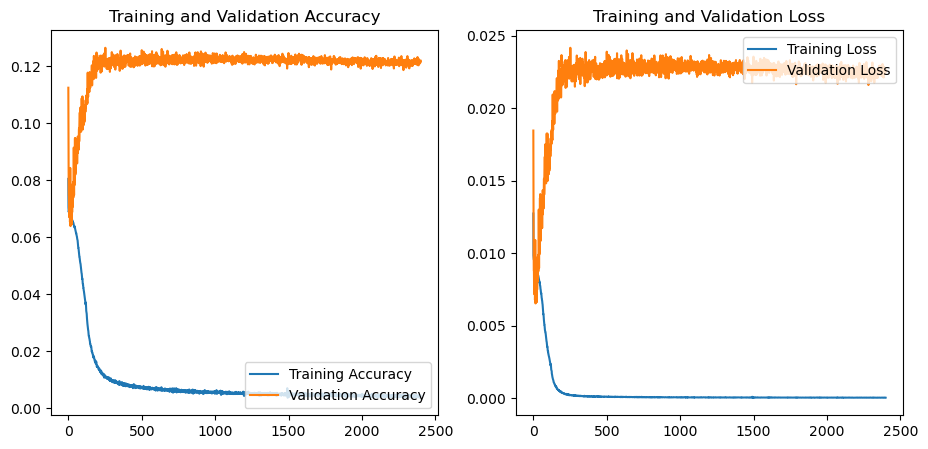

In [8]:

acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ion()


In [9]:
y_pred = model.predict(X_train)
for i in range(10):
    print("Pridicted:", y_pred[i], "Real value:", y_train[i])
print()
print(f"{y_train[-1]}")

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Pridicted: [-0.4036709  -0.46461192 -0.3590175  -0.28324017 -0.34823442 -0.43334588
 -0.42882568 -0.41436017 -0.403928  ] Real value: [-0.40136986 -0.46164384 -0.35342466 -0.27945205 -0.34931507 -0.43013699
 -0.42739726 -0.41369863 -0.39726027]
Pridicted: [-0.46557218 -0.35770795 -0.2813072  -0.3510212  -0.42975435 -0.43653348
 -0.40678245 -0.4031321  -0.41870612] Real value: [-0.46164384 -0.35342466 -0.27945205 -0.34931507 -0.43013699 -0.42739726
 -0.41369863 -0.39726027 -0.41780822]
Pridicted: [-0.35209465 -0.28051785 -0.34810475 -0.43110624 -0.43116555 -0.41247454
 -0.39174688 -0.42331287 -0.42454508] Real value: [-0.35342466 -0.27945205 -0.34931507 -0.43013699 -0.42739726 -0.41369863
 -0.39726027 -0.41780822 -0.42328767]
Pridicted: [-0.28172114 -0.34396863 -0.4297893  -0.4320941  -0.41340354 -0.39519808
 -0.41816622 -0.42309865 -0.3611399 ] Real value: [-0.27945205 -0.34931507 -0.43013699 -0.42739726 -0.41369863 -0.39726027
 -0.41780822 -0.4

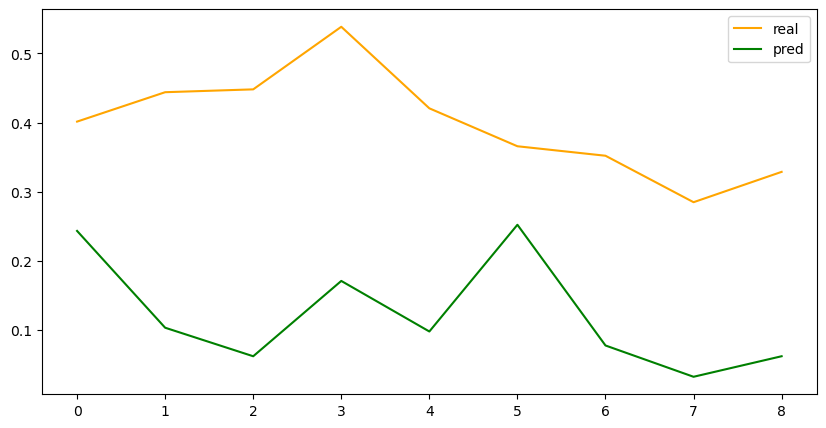

In [10]:
plt.figure(figsize=(10,5))
plt.plot(y_train[-1], color = 'orange', label = 'real')
plt.plot(y_pred[-1], color = 'green', label = 'pred')
plt.legend()
plt.ion()

# Save Model

In [11]:
model.save("models/" + name + ".keras")